In [1]:
# build the diabetes prediction model using a logistic regression classifier.

# dataset: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
# target variable: Outcome (1: diabetes; 0: non) --> binary classification task

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# load the dataset
pima = pd.read_csv("/content/pima-indians-diabetes.csv")

In [4]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Selecting features
# divide the given columns into two types of variables
# dependent(or target variable) and independent variable(or feature variables)


X = pima.iloc[:,:-1] # Features
y = pima['Outcome'] # Target variable

In [6]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [7]:
# Splitting the dataset into a training set and a test set
# train_test_split(), pass 3 parameters: features, target, and test_set size
# random_state to select records randomly

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [8]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((576, 8), (192, 8), (576,), (192,))

In [9]:
# train the model
from sklearn.linear_model import LogisticRegression

# instantiate the model
# max_iter: Maximum number of iterations taken for the solvers to converge, default=100

log_reg = LogisticRegression(max_iter=1000)

# fit the model with training data
log_reg.fit(X_train, y_train)

# predictions for test data
y_pred = log_reg.predict(X_test)

In [10]:
y_pred[:5]

array([1, 0, 0, 0, 0])

In [11]:
# return the predicted probabilities
y_pred_proba = log_reg.predict_proba(X_test)

In [12]:
y_pred_proba[:5]

array([[0.46789092, 0.53210908],
       [0.79130778, 0.20869222],
       [0.96914084, 0.03085916],
       [0.93071922, 0.06928078],
       [0.88887815, 0.11112185]])

In [13]:
# Model Evaluation using Confusion Matrix

# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

In [14]:
cnf_matrix

array([[116,   9],
       [ 25,  42]])

Text(0.5, 427.9555555555555, 'Predicted label')

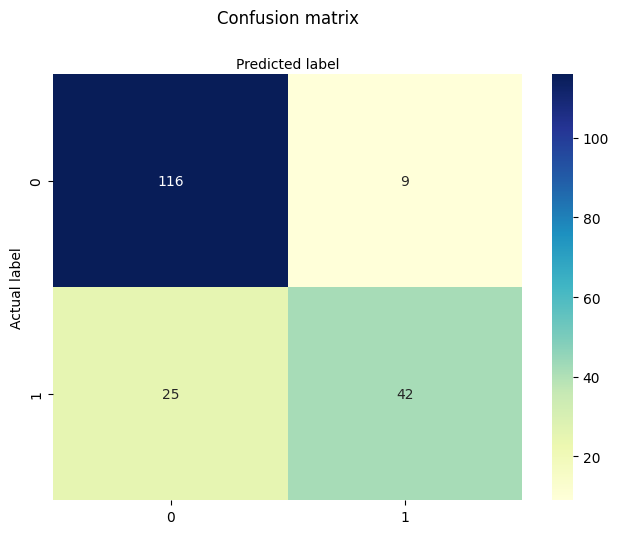

In [15]:
# visualize the confusion matrix using Heatmap
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [16]:
# using classification_report for accuracy, precision, and recall

from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.82      0.93      0.87       125
   with diabetes       0.82      0.63      0.71        67

        accuracy                           0.82       192
       macro avg       0.82      0.78      0.79       192
    weighted avg       0.82      0.82      0.82       192



In [17]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities
# # probabilities for the positive class
y_proba = log_reg.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

In [18]:
auc

np.float64(0.8773731343283582)

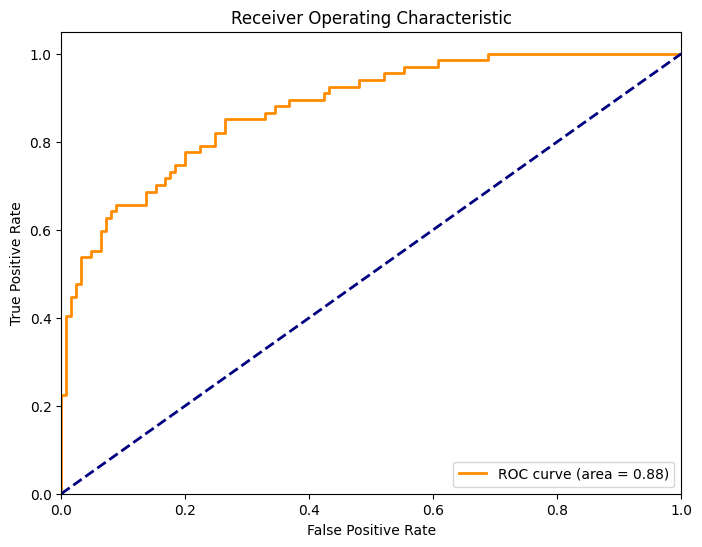

In [19]:
# Plotting roc_auc
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [22]:
# cross validation
from sklearn.model_selection import cross_val_score, StratifiedKFold

model = LogisticRegression(max_iter=1000)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

scores_acc = cross_val_score(model, X, y, cv=cv, scoring="accuracy")
scores_precision = cross_val_score(model, X, y, cv=cv, scoring="precision")
scores_recall = cross_val_score(model, X, y, cv=cv, scoring="recall")
scores_f1 = cross_val_score(model, X, y, cv=cv, scoring="f1")

print("Mean accuracy:", scores_acc.mean())
print("Mean precision:", scores_precision.mean())
print("Mean recall:", scores_recall.mean())
print("Mean f1:", scores_f1.mean())



Mean accuracy: 0.775974025974026
Mean precision: 0.7358624108524238
Mean recall: 0.5823361823361823
Mean f1: 0.6437796585476527
